# Task: Table Booking and Online Delivery

In [34]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

#handle missing values
# Replace NaN values in 'Cuisines' column with the mode of the column
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
missing_values = df.isnull().sum()
print(missing_values)

# Convert categorical columns to 'category' type
categorical_columns = [ "Restaurant Name", "City", "Address", "Locality", "Locality Verbose","Cuisines", "Currency", "Rating color", "Rating text" ]
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert binary columns to boolean type (assuming "Yes"/"No" values)
binary_columns = ["Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"]
df[binary_columns] = df[binary_columns].map(lambda x: True if x == "Yes" else False)
print(df.dtypes)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID              int64
Restaurant Name         category
Country Code               int64
City                    category
Address                 category
Locality                category
Locality Verbose        category
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking           bool
Has Online d

### 1. The percentage of restaurants offering table booking and online delivery

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100

print(f"Percentage of restaurants offering Table Booking:\n{table_booking_percentage}")
print(f"Percentage of restaurants offering Online Delivery:\n{online_delivery_percentage}")

Percentage of restaurants offering Table Booking:
Has Table booking
False    87.875615
True     12.124385
Name: proportion, dtype: float64
Percentage of restaurants offering Online Delivery:
Has Online delivery
False    74.337766
True     25.662234
Name: proportion, dtype: float64


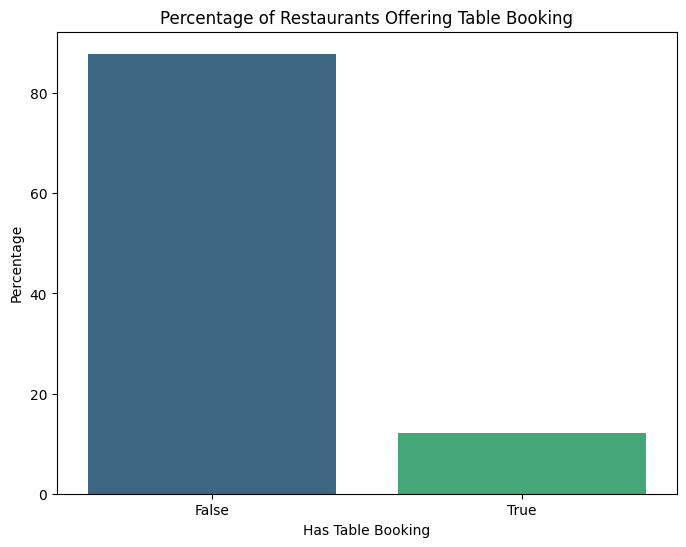

In [17]:
# Plot for table booking percentage with the updated syntax
plt.figure(figsize=(8, 6))
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values, hue=table_booking_percentage.index, palette='viridis', legend=False)
plt.title('Percentage of Restaurants Offering Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.show()

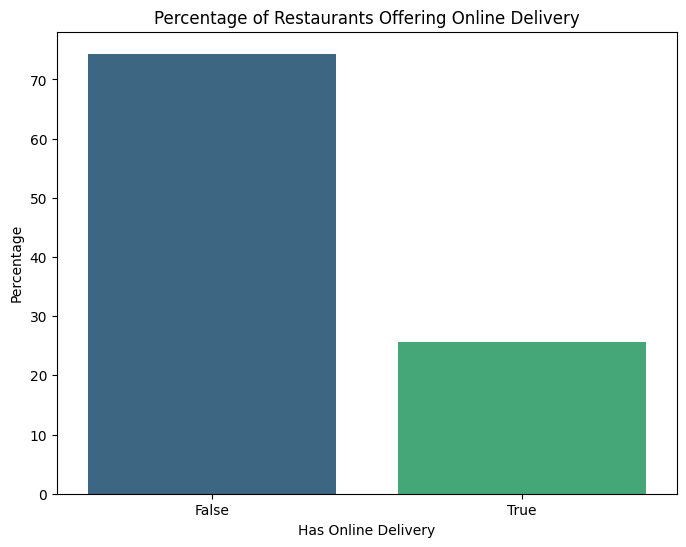

In [18]:
# Plot for online delivery percentage with the updated syntax
plt.figure(figsize=(8, 6))
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values, hue=online_delivery_percentage.index, palette='viridis', legend=False)
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.show()

### 2. Comparing the average ratings of restaurants with table booking and those without

In [9]:
table_booking_avg_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(f"Average ratings for restaurants with and without table booking:\n{table_booking_avg_rating}")

Average ratings for restaurants with and without table booking:
Has Table booking
False    2.559359
True     3.441969
Name: Aggregate rating, dtype: float64


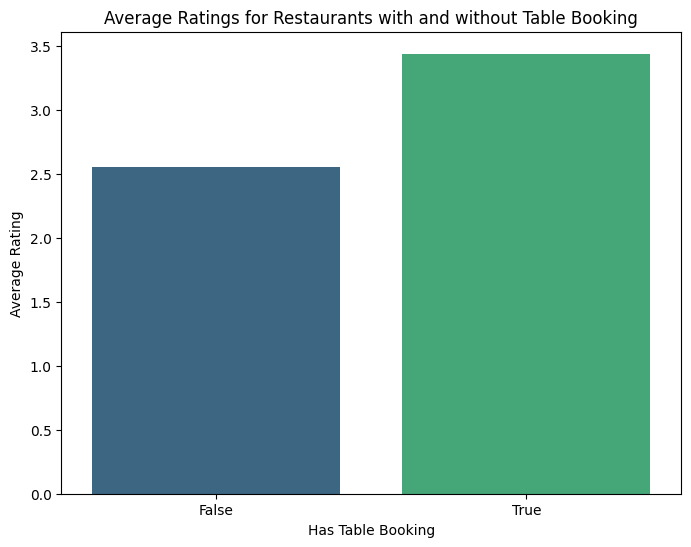

In [19]:
# Plot for average ratings by table booking
plt.figure(figsize=(8, 6))
sns.barplot(x=table_booking_avg_rating.index, y=table_booking_avg_rating.values, hue=table_booking_avg_rating.index, palette='viridis', legend=False)
plt.title('Average Ratings for Restaurants with and without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()

### 3. Analyzing the availability of online delivery among restaurants with different price ranges

In [13]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
print(f"Percentage of online delivery availability by Price Range:\n{online_delivery_by_price}")

Percentage of online delivery availability by Price Range:
Has Online delivery      False      True 
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


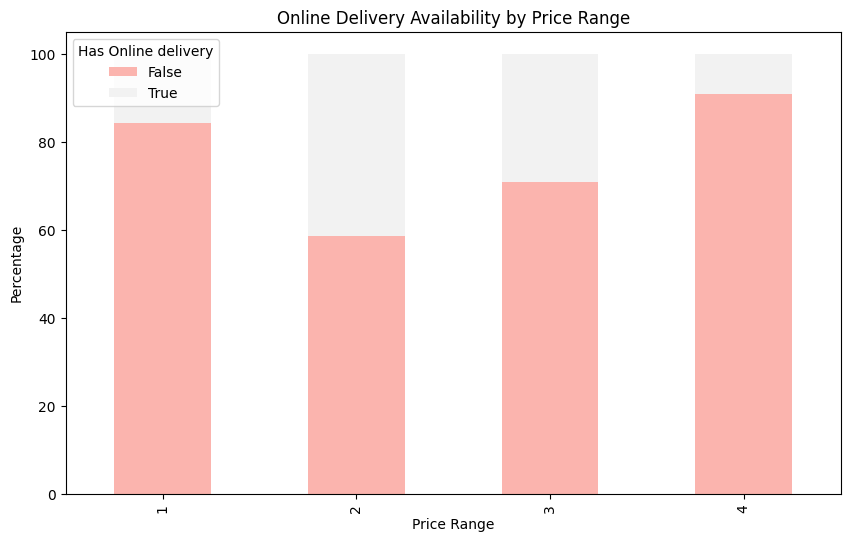

In [33]:
# Plot for online delivery availability by price range
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.show()